# 6.6 Sourcing and Analyzing Time Series Data

## Importing librairies, path and data

## Data wrangling for OECD members dataframe

## Time series analysis (not working)

## Testing for stationarity

## Stationarizing the population of the OECD

## Answers to the questions

## Importing librairies, path and data

In [88]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [90]:
# Defining the path 
path = r'C:\Users\salmi\Desktop\achievement 6'

In [92]:
# Uploading dataset from the World Bank for the total population between 1960 to 2023
world_pop_for_ts = pd.read_csv(os.path.join(path, 'Data sets','Original Data Happiness', 'world_pop_for_time_series.csv' ), index_col = False)

In [94]:
world_pop_for_ts.head(5)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,103594,104257,104874,105439,105962,106442,106585,106537,106445,106277
1,Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,583651101,600008424,616377605,632746570,649757148,667242986,685112979,702977106,720859132,739108306
2,Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,42239854
3,Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,397855507,408690375,419778384,431138704,442646825,454306063,466189102,478185907,490330870,502789511
4,Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,27128337,28127721,29154746,30208628,31273533,32353588,33428486,34503774,35588987,36684202


In [96]:
world_pop_for_ts.columns

Index(['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')

In [98]:
world_pop_for_ts['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [100]:
type(world_pop_for_ts)

pandas.core.frame.DataFrame

In [102]:
world_pop_for_ts.shape

(265, 65)

In [104]:
pop_OECD = world_pop_for_ts[world_pop_for_ts['Country Name'] == 'OECD members']

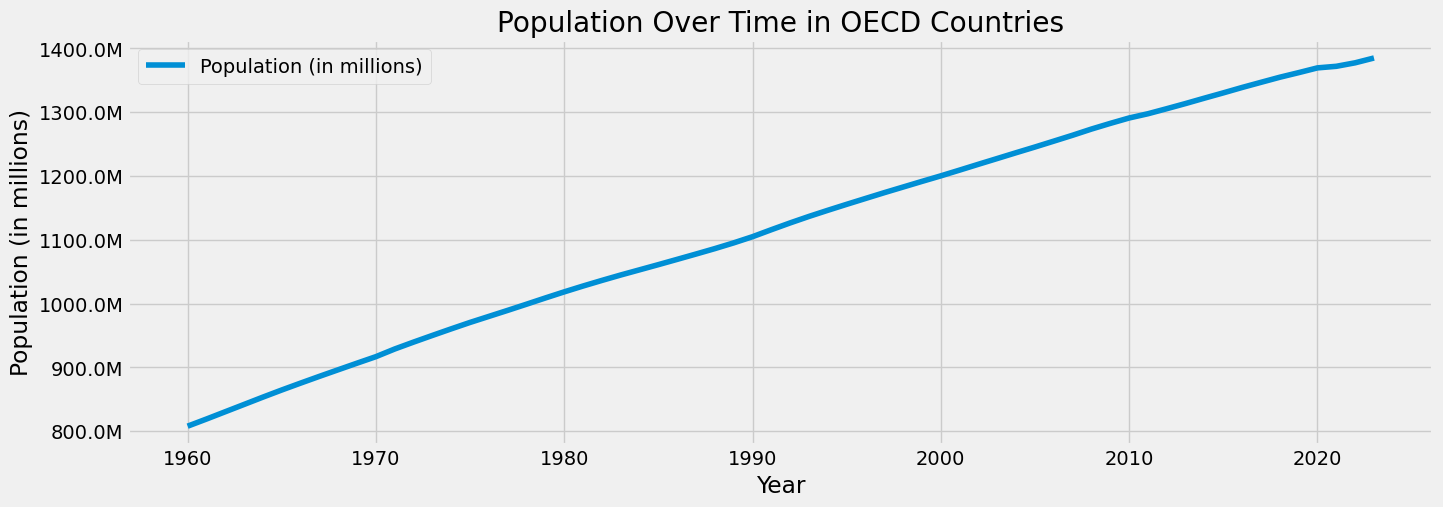

In [106]:
from matplotlib.ticker import FuncFormatter  # importing a formatter

# Melting the DataFrame
pop_OECD = pop_OECD.melt(id_vars=['Country Name'], var_name='Year', value_name='Population')

# Convert the 'Year' column to datetime
pop_OECD['Year'] = pd.to_datetime(pop_OECD['Year'], format='%Y')

# Define a formatter to convert population to millions
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Plot the data
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(pop_OECD['Year'], pop_OECD['Population'], label='Population (in millions)')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# Formatting the plot
plt.title('Population Over Time in OECD Countries')
plt.xlabel('Year')
plt.ylabel('Population (in millions)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

## Data wrangling for OECD members dataframe

In [217]:
# Filter the DataFrame for the OECD members
world_pop_oecd = world_pop_for_ts[world_pop_for_ts['Country Name'] == 'OECD members']

# Remove the 'Country Name' column before melting
world_pop_oecd_numeric = world_pop_oecd.drop(columns=['Country Name'])

# Step 2: Melt the DataFrame to reshape it
world_pop_oecd_melted = world_pop_oecd_numeric.melt(var_name='Year', value_name='OECD population')

# Step 3: Ensure 'Year' column is properly formatted
# Convert 'Year' column to numeric, forcing errors to NaN and then drop rows with NaN in 'Year'
world_pop_oecd_melted['Year'] = pd.to_numeric(world_pop_oecd_melted['Year'], errors='coerce')

# Drop rows where 'Year' is NaN (if any)
world_pop_oecd_melted = world_pop_oecd_melted.dropna(subset=['Year'])

# Convert 'Year' column to integer (if you prefer)
world_pop_oecd_melted['Year'] = world_pop_oecd_melted['Year'].astype(int)

# Reset index if needed (optional)
world_pop_oecd_melted.reset_index(drop=True, inplace=True)

world_pop_oecd_melted

,Year,OECD population
0,1960,8.076309e+08
1,1961,8.188321e+08
2,1962,8.302891e+08
3,1963,8.417223e+08
4,1964,8.532007e+08
...,...,...
59,2019,1.362032e+09
60,2020,1.369502e+09
61,2021,1.371973e+09
62,2022,1.377466e+09


## Time series analysis: decomposition

In [220]:
world_pop_oecd_melted.columns

Index(['Year', 'OECD population'], dtype='object')

In [222]:
# Set 'Year' as the index
world_pop_oecd_melted.set_index('Year', inplace=True)

# Convert the index to a PeriodIndex with yearly frequency
world_pop_oecd_melted.index = pd.PeriodIndex(world_pop_oecd_melted.index, freq='Y')

world_pop_oecd_melted

,OECD population
Year,
1960,8.076309e+08
1961,8.188321e+08
1962,8.302891e+08
1963,8.417223e+08
1964,8.532007e+08
...,...
2019,1.362032e+09
2020,1.369502e+09
2021,1.371973e+09


## Testing for stationarity

In [229]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(world_pop_oecd_melted['OECD population'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.069499
p-value                         0.028894
Number of Lags Used             1.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


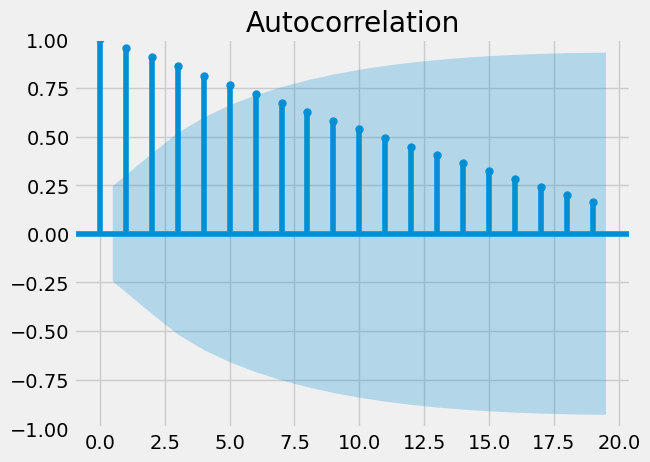

In [231]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(world_pop_oecd_melted)
plt.show()

## Stationarizing the Population of the OECD

In [236]:
world_pop_data_diff = world_pop_oecd_melted - world_pop_oecd_melted.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [242]:
world_pop_data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [244]:
world_pop_data_diff.head()

,OECD population
Year,
1961,11201207.0
1962,11456986.0
1963,11433175.0
1964,11478420.0
1965,11203396.0


In [246]:
world_pop_data_diff.columns

Index(['OECD population'], dtype='object')

In [250]:
dickey_fuller(world_pop_data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.640997
p-value                         0.084817
Number of Lags Used             0.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


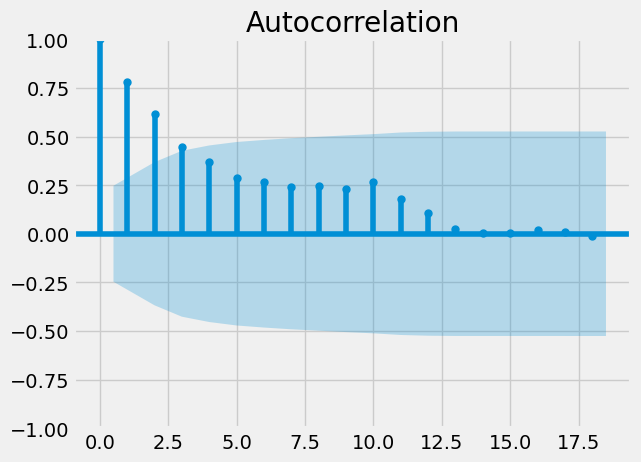

In [252]:
plot_acf(world_pop_data_diff)
plt.show()

## Answers to the questions

The first test (before stationarizing), suggests that the series might be stationary, but the evidence was not strong enough to conclusively reject the null hypothesis at the 5% level. Since the Test Statistic (-3.069499) is less negative than the critical value at 5% (-2.909427), it fails to reject the null hypothesis at the 5% significance level. Also, with a p-value (0.028894) that is less than 0.05, suggest that we can reject the null hypothesis at 5% level and that this means the timer-series is likely stationary.


The second test (after stationarizing), it seems tha the series is most likely stationary but only at the 10% level. The results, with a p-value at (0.08417) that is less than 0.1, meaning that we can only reject the null hypothesis at the 10% level. 
So we can say tha the stationarizing method used improved the stationarity but did not achieve it perfectly.

Since this time-series data is related to populations indicators, they often exhibit a certain trend (mainly increasing over the years). A times-series with a trend might not be stationary if the mean is changing over time. 

We would need to check other method or techniques to ensure that this time series meets the stationarity requirements to build a model.